# Installing and importing packages

In [27]:
! pip install tweepy

In [28]:
! pip install PyDrive

In [0]:
# Run this cell to import the packages you will need to unpack the dataset
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import pickle
import os
import zipfile
import scipy.ndimage
from google.colab import files

import tweepy
import sys
import json
import codecs
from tweepy.parsers import JSONParser

# Getting new dataset that is cleaned

In [0]:
### authentication -- run once 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
 
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [31]:
### lists the files in the folder 
file_list = drive.ListFile({'q': "'18sX8Dymv_AAEaY7mJxbmh_LjljD8oRwK' in parents and trashed=false"}).GetList() ## long string in the url of folder
for file1 in file_list:
  print('title: %s, id: %s' % (file1['title'], file1['id']))

title: data_2000_1.csv, id: 10I3yFH_Lvnu68XTFaYGk8ud9BbD5w5Z9
title: Data WITH b', id: 1yDewPt327TxTrKCvuCIpHNyigDMaKPyv
title: data_tweet_clean_500_4.csv, id: 1i_oXjZ3QtiOtsovmO48r1vlAnMDGjZ7Y
title: glove.6B.zip, id: 1tuFKpS8F1lhnaemAYi_w498Vli6WGuKP
title: data_tweet_clean_500_stop.csv, id: 1bUddQJ0LejpEROhpWmMtYYSoXvR2q4pc
title: data_tweet_clean_500_1, id: 1NpwnlyjqIPfaP17zsFjlrApdR18KdUbQNnFaDfambGs
title: data_tweet_clean_500_1, id: 1uMqBX5G--17uD-lUfvjz87202vNvyhQM3chdrAP0Lgw
title: Data Cleaning, id: 1JsVnP9kago0ipdSqtX7txLQWMTwSPZ3X
title: data_Tweet_clean.csv, id: 1FNa4-dHR6aEeunRIwMnaBBacSlCHZOsW
title: Medication_1, id: 1yvcgD5F6on7s9gwS56GWajZNPtvYg_4H
title: Twitter_Neg_Pos, id: 1-SvbE_55FqDfqtp588p3HvcojmREUOWc


In [32]:
### download the file 
file_downloaded = drive.CreateFile({'id': '10I3yFH_Lvnu68XTFaYGk8ud9BbD5w5Z9'})
file_downloaded.GetContentFile('data_2000_1.csv')

df_data = pd.read_csv('data_2000_1.csv', dtype = object)
df_data.head(10)

,Tweet ID,User ID,Bullying_Traces?,Type,Form,Teasing?,Author_Role,Emotion,Text
0,107688644067856384,185389094,y,self-disclosure,other,n,defender,empathy,@bellathorne143 i herd that you got bullied wh...
1,102206417217392640,226320672,n,NaN,NaN,NaN,NaN,NaN,"Bullying: O gesto mais idiota, estpido e irrac..."
2,102779484725448704,297557032,n,NaN,NaN,NaN,NaN,NaN,The Bully at School Goes High Tech Part 1: \n...
3,108676972149874688,157724561,n,NaN,NaN,NaN,NaN,NaN,Esse @Felipemath fazendo bullying comigo! Haha'
4,106590106873372672,62179998,n,NaN,NaN,NaN,NaN,NaN,AUISHUAHS eu e o @wallace_mancha tiramos o dia...
5,109034091743154176,177913822,n,NaN,NaN,NaN,NaN,NaN,"@Looweihao @haoyangg @sleepybed Hello, since w..."
6,102533497637437441,70412906,y,report,other,n,reporter,none,For those keeping score at home- cousin who ju...
7,103679008855691264,11363462,n,NaN,NaN,NaN,NaN,NaN,"BETTER ANTI-BULLYING AD SLOGANS: Hey, Bullies...."
8,105202476927549441,293593896,n,NaN,NaN,NaN,NaN,NaN,@luttylutz bahh lo kaga demen dia juga? Gue ki...
9,107278521805713408,150964152,n,NaN,NaN,NaN,NaN,NaN,cara3: bully iam gara2 uda di ucpin tpi gk bls'


# Authenticating Twitter Process

In [0]:
####### Access Information #################

# Parameter you need to specify
consumer_key = '7w9qPKMQzbCNvx4cjVoaLqjjt'
consumer_secret = 'bj8lNT1yJTkZHlIbg6n7NEBTX73oQttmbPy7nCUuEcYEuldt7O'
access_key = '4439149653-6eK3Z25ODtI3sg7rv3NqNLAWmO6vz270Lewq1tD'
access_secret = 'AJtrhAdfUmWjWnirvASSsp5PEjDbiNwO5XBDxeSuLypxs'

inputFile = 'tweet_id'
outputFile = 'tweet.json'

#############################################

In [0]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tweepy.API(auth_handler=auth, parser=JSONParser())

# Just testing out text extraction and adding it as a feature

In [0]:
#extracting the text sample (EXAMPLE)

tweet = api.get_status(int(df_data['Tweet ID'][0]))
#text = tweet['text'].encode('ascii', 'ignore')

In [35]:
location = tweet['user']['location'].encode('ascii', 'ignore')
type(location)

str

In [36]:
### concatenating a list of zeros to dataframe
l = pd.Series(list(np.zeros(df_data.shape[0])))
df_data_sample = pd.concat([df_data, l], axis = 1)
df_data_sample = df_data_sample.rename(columns={0: "Location"})
df_data_sample.head(10)

,Tweet ID,User ID,Bullying_Traces?,Type,Form,Teasing?,Author_Role,Emotion,Text,Location
0,107688644067856384,185389094,y,self-disclosure,other,n,defender,empathy,@bellathorne143 i herd that you got bullied wh...,0.0
1,102206417217392640,226320672,n,NaN,NaN,NaN,NaN,NaN,"Bullying: O gesto mais idiota, estpido e irrac...",0.0
2,102779484725448704,297557032,n,NaN,NaN,NaN,NaN,NaN,The Bully at School Goes High Tech Part 1: \n...,0.0
3,108676972149874688,157724561,n,NaN,NaN,NaN,NaN,NaN,Esse @Felipemath fazendo bullying comigo! Haha',0.0
4,106590106873372672,62179998,n,NaN,NaN,NaN,NaN,NaN,AUISHUAHS eu e o @wallace_mancha tiramos o dia...,0.0
5,109034091743154176,177913822,n,NaN,NaN,NaN,NaN,NaN,"@Looweihao @haoyangg @sleepybed Hello, since w...",0.0
6,102533497637437441,70412906,y,report,other,n,reporter,none,For those keeping score at home- cousin who ju...,0.0
7,103679008855691264,11363462,n,NaN,NaN,NaN,NaN,NaN,"BETTER ANTI-BULLYING AD SLOGANS: Hey, Bullies....",0.0
8,105202476927549441,293593896,n,NaN,NaN,NaN,NaN,NaN,@luttylutz bahh lo kaga demen dia juga? Gue ki...,0.0
9,107278521805713408,150964152,n,NaN,NaN,NaN,NaN,NaN,cara3: bully iam gara2 uda di ucpin tpi gk bls',0.0


# ACTUALLY EXTRACTING THE DATA

In [37]:
df_data_part = df_data_sample.iloc[0:500]
df_data_part.shape


(500, 10)

In [0]:
tweet = api.get_status(int(df_data['Tweet ID'][2000]))
tweet['user']['time_zone']

In [53]:
tweet

{u'contributors': None,
 u'coordinates': None,
 u'created_at': u'Tue Aug 23 13:40:30 +0000 2011',
 u'entities': {u'hashtags': [],
  u'symbols': [],
  u'urls': [],
  u'user_mentions': []},
 u'favorite_count': 0,
 u'favorited': False,
 u'geo': None,
 u'id': 105997845311655936,
 u'id_str': u'105997845311655936',
 u'in_reply_to_screen_name': None,
 u'in_reply_to_status_id': None,
 u'in_reply_to_status_id_str': None,
 u'in_reply_to_user_id': None,
 u'in_reply_to_user_id_str': None,
 u'is_quote_status': False,
 u'lang': u'pt',
 u'place': None,
 u'retweet_count': 0,
 u'retweeted': False,
 u'source': u'<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
 u'text': u'Sofri bullying aqui :(',
 u'truncated': False,
 u'user': {u'contributors_enabled': False,
  u'created_at': u'Sat Feb 19 18:47:56 +0000 2011',
  u'default_profile': False,
  u'default_profile_image': False,
  u'description': u'',
  u'entities': {u'description': {u'urls': []},
   u'url': {u'urls': [{u'display_url': u'

In [45]:
indices_to_drop = list()
for i in range(0, 500):
  try:
    tweet = api.get_status(int(df_data_part['Tweet ID'][i]))
    loc= tweet['user']['location'].encode('ascii', 'ignore')
    df_data_part['Location'][i] = loc
  except tweepy.error.TweepError:
    print(tweepy.error.TweepError)
    indices_to_drop.append(i)
    pass

  if i % 100 == 0:
    print(i)


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python2.7/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python2.7/dist-packages/pandas/core/series.py:769: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc[key] = value
/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWit

0
100
200
300
400


In [46]:
len(indices_to_drop)

0

## Processed the first 500 

In [47]:
df_data_CLEAN = df_data_part.drop(indices_to_drop)


,Tweet ID,User ID,Bullying_Traces?,Type,Form,Teasing?,Author_Role,Emotion,Text,Location
0,107688644067856384,185389094,y,self-disclosure,other,n,defender,empathy,@bellathorne143 i herd that you got bullied wh...,texas
1,102206417217392640,226320672,n,NaN,NaN,NaN,NaN,NaN,"Bullying: O gesto mais idiota, estpido e irrac...",
2,102779484725448704,297557032,n,NaN,NaN,NaN,NaN,NaN,The Bully at School Goes High Tech Part 1: \n...,"Victoria, BC, Canada"
3,108676972149874688,157724561,n,NaN,NaN,NaN,NaN,NaN,Esse @Felipemath fazendo bullying comigo! Haha',Brasil
4,106590106873372672,62179998,n,NaN,NaN,NaN,NaN,NaN,AUISHUAHS eu e o @wallace_mancha tiramos o dia...,Brazil
5,109034091743154176,177913822,n,NaN,NaN,NaN,NaN,NaN,"@Looweihao @haoyangg @sleepybed Hello, since w...",
6,102533497637437441,70412906,y,report,other,n,reporter,none,For those keeping score at home- cousin who ju...,North Carolina
7,103679008855691264,11363462,n,NaN,NaN,NaN,NaN,NaN,"BETTER ANTI-BULLYING AD SLOGANS: Hey, Bullies....","Grayslake, IL"
8,105202476927549441,293593896,n,NaN,NaN,NaN,NaN,NaN,@luttylutz bahh lo kaga demen dia juga? Gue ki...,
9,107278521805713408,150964152,n,NaN,NaN,NaN,NaN,NaN,cara3: bully iam gara2 uda di ucpin tpi gk bls',surabaya jawa timur


In [49]:
df_data_CLEAN.head(20)

,Tweet ID,User ID,Bullying_Traces?,Type,Form,Teasing?,Author_Role,Emotion,Text,Location
0,107688644067856384,185389094,y,self-disclosure,other,n,defender,empathy,@bellathorne143 i herd that you got bullied wh...,texas
1,102206417217392640,226320672,n,NaN,NaN,NaN,NaN,NaN,"Bullying: O gesto mais idiota, estpido e irrac...",
2,102779484725448704,297557032,n,NaN,NaN,NaN,NaN,NaN,The Bully at School Goes High Tech Part 1: \n...,"Victoria, BC, Canada"
3,108676972149874688,157724561,n,NaN,NaN,NaN,NaN,NaN,Esse @Felipemath fazendo bullying comigo! Haha',Brasil
4,106590106873372672,62179998,n,NaN,NaN,NaN,NaN,NaN,AUISHUAHS eu e o @wallace_mancha tiramos o dia...,Brazil
5,109034091743154176,177913822,n,NaN,NaN,NaN,NaN,NaN,"@Looweihao @haoyangg @sleepybed Hello, since w...",
6,102533497637437441,70412906,y,report,other,n,reporter,none,For those keeping score at home- cousin who ju...,North Carolina
7,103679008855691264,11363462,n,NaN,NaN,NaN,NaN,NaN,"BETTER ANTI-BULLYING AD SLOGANS: Hey, Bullies....","Grayslake, IL"
8,105202476927549441,293593896,n,NaN,NaN,NaN,NaN,NaN,@luttylutz bahh lo kaga demen dia juga? Gue ki...,
9,107278521805713408,150964152,n,NaN,NaN,NaN,NaN,NaN,cara3: bully iam gara2 uda di ucpin tpi gk bls',surabaya jawa timur


In [72]:
df_data_CLEAN['Location'].unique()

array(['texas', '', 'Victoria, BC, Canada', 'Brasil', 'Brazil',
       'North Carolina', 'Grayslake, IL', 'surabaya jawa timur',
       'Pennslyvania', 'York', 'Norn iron', 'New Washington, Aklan',
       'Tapira, So Paulo', 'Antofagasta, Chile.', 'Granger, IN',
       'Manaus, Brasil', 'Kebayoran Lama', 'Los Angeles', 'so paulo',
       'compulsive tweet deleter', 'Southern California, USA',
       'Atlanta, GA', 'Chicago, IL  Whitewater, WI', 'Charlotte NC',
       'Twin Cities, Minnesota', 'Earth , USA', 'Coatesville, PA',
       'Ribeiro Preto - SP', 'London', 'Stratford, Ontario', 'Indonesia',
       'Chile ', 'Brasil ', 'San Francisco', 'UKLONDON', 'Curitiba',
       'ElektroIndustriITS  15Libels', 'NY, CA, MA',
       'Formiga/BH - MG/Brasil', 'Espirito Santo', 'Indian Reservation',
       'Manchester', 'Orlando, Florida', 'ATL / LA',
       ' Rua dos bobos, n 0', 'East Coast', '021', "Kentucky y'all ",
       'Lorena, Brasil', 'Republic of 2PM :D',
       'Bandung, West Java, I

/usr/lib/python2.7/dist-packages/cartopy/io/__init__.py:264: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


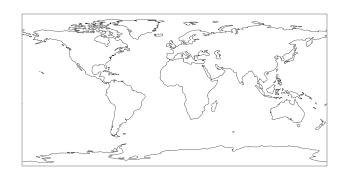

In [63]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

# Save the plot by calling plt.savefig() BEFORE plt.show()
plt.savefig('coastlines.pdf')
plt.savefig('coastlines.png')

plt.show()

In [0]:
### save it to the csv file
df_data_CLEAN.to_csv('data_tweet_clean_500_3.csv')

from google.colab import files
files.download('data_tweet_clean_500_3.csv')

In [0]:
api.wait_on_rate_limit

False